Data_Analysis

In [1]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder

In [4]:
# Directory path
directory_path = r'C:\Users\mariw\Downloads\HumanLoopNet---Augmented-Learning-System-With-Human-Incorporation\Fashion_data'

#List of all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Initializing an empty list to store DataFrames
dataframes = []

# Iterating through the list of CSV files and loaing them into DataFrames
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

# Concatenating all DataFrames into a single DataFrame
data = pd.concat(dataframes, axis=0, ignore_index=True)

In [5]:
data.head()
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 419.2 MB
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


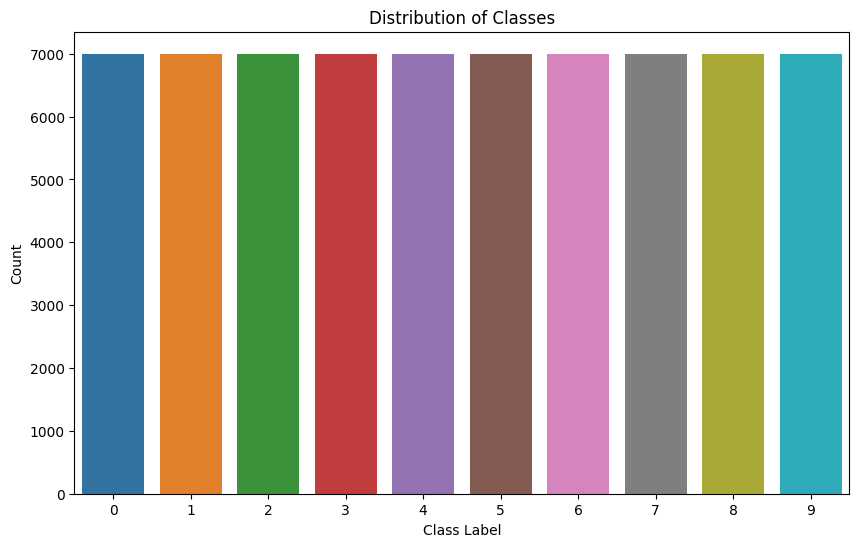

In [6]:
# Extracting the 'label' column
class_labels = data['label']

# Visualizing the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x=class_labels)
plt.title('Distribution of Classes')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

Model Development

In [7]:
# Image size
IMG_WIDTH, IMG_HEIGHT = 100, 100

# Preprocessing
def preprocess_data(data):
    X = []
    y = []

    for index, row in data.iterrows():
        image = load_img(row[r'C:\Users\mariw\Downloads\HumanLoopNet---Augmented-Learning-System-With-Human-Incorporation\Fashion_data\train-images-idx3-ubyte'], target_size=(IMG_WIDTH, IMG_HEIGHT))
        image = img_to_array(image)
        image = image / 255.0
        X.append(image)
        y.append(row['class_label'])

    X = np.array(X)
    y = np.array(y)

    # Encoding the target labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y

In [9]:
import idx2numpy as idx
# Paths to the image data and labels
image_path = r'C:\Users\mariw\Downloads\HumanLoopNet---Augmented-Learning-System-With-Human-Incorporation\Fashion_data\train-images-idx3-ubyte'
label_path = r'C:\Users\mariw\Downloads\HumanLoopNet---Augmented-Learning-System-With-Human-Incorporation\Fashion_data\train-labels-idx1-ubyte'
X = idx.convert_from_file(image_path)
y = idx.convert_from_file(label_path)
X = X.reshape(X.shape[0], -1)

# DataFrame
data = pd.DataFrame({
    'image_data': np.array(X).tolist(),
    'class_label': y
})

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_val /= 255

In [13]:
input_shape = (28, 28, 3)
num_classes = 10

# CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compiling model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.5155 - accuracy: 0.8108 - val_loss: 0.3653 - val_accuracy: 0.8692
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3272 - accuracy: 0.8813 - val_loss: 0.3149 - val_accuracy: 0.8848
Epoch 3/5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2816 - accuracy: 0.8970 - val_loss: 0.2942 - val_accuracy: 0.8915
Epoch 4/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2461 - accuracy: 0.9096 - val_loss: 0.2780 - val_accuracy: 0.8974
Epoch 5/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2204 - accuracy: 0.9191 - val_loss: 0.2621 - val_accuracy: 0.9038


In [14]:
# Parameters adjusting
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 34s 45ms/step - loss: 0.1792 - accuracy: 0.9336 - val_loss: 0.2611 - val_accuracy: 0.9068
Epoch 2/10
750/750 [==============================] - 34s 45ms/step - loss: 0.1650 - accuracy: 0.9393 - val_loss: 0.2639 - val_accuracy: 0.9069
Epoch 3/10
750/750 [==============================] - 27s 35ms/step - loss: 0.1540 - accuracy: 0.9432 - val_loss: 0.2666 - val_accuracy: 0.9083
Epoch 4/10
750/750 [==============================] - 24s 32ms/step - loss: 0.1412 - accuracy: 0.9480 - val_loss: 0.2749 - val_accuracy: 0.9078
Epoch 5/10
750/750 [==============================] - 28s 38ms/step - loss: 0.1296 - accuracy: 0.9525 - val_loss: 0.2718 - val_accuracy: 0.9093
Epoch 6/10
750/750 [==============================] - 27s 36ms/step - loss: 0.1181 - accuracy: 0.9574 - val_loss: 0.2805 - val_accuracy: 0.9111
Epoch 7/10
750/750 [==============================] - 28s 38ms/step - loss: 0.1082 - accuracy: 0.9600 - val_loss: 0.2965 - val_accuracy: